# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [185]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [226]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [227]:
# Tampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [228]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [229]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

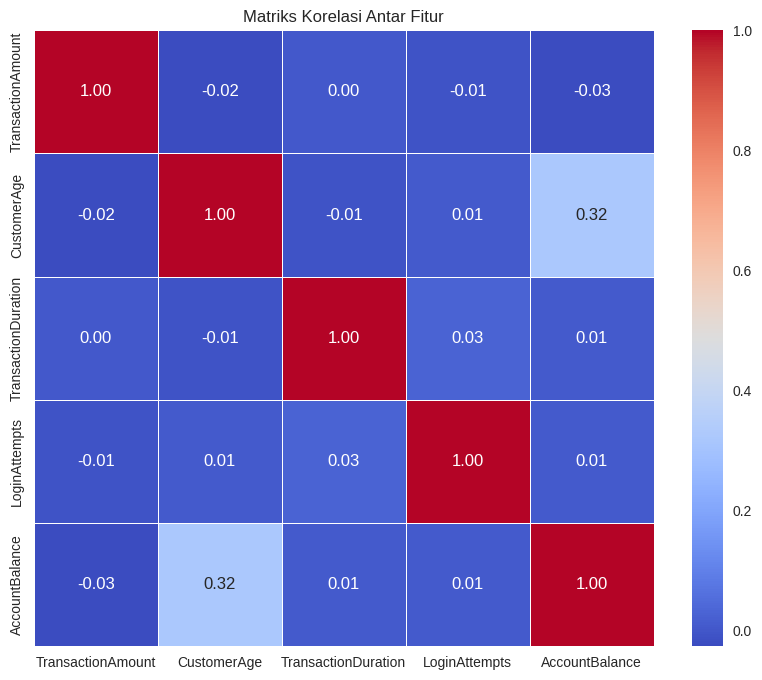

In [230]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_columns = df.select_dtypes(include=['number']).columns

# Mengganti NaN dengan median pada kolom numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Matriks korelasi antar kolom numerik
correlation_matrix = df[numerical_columns].corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

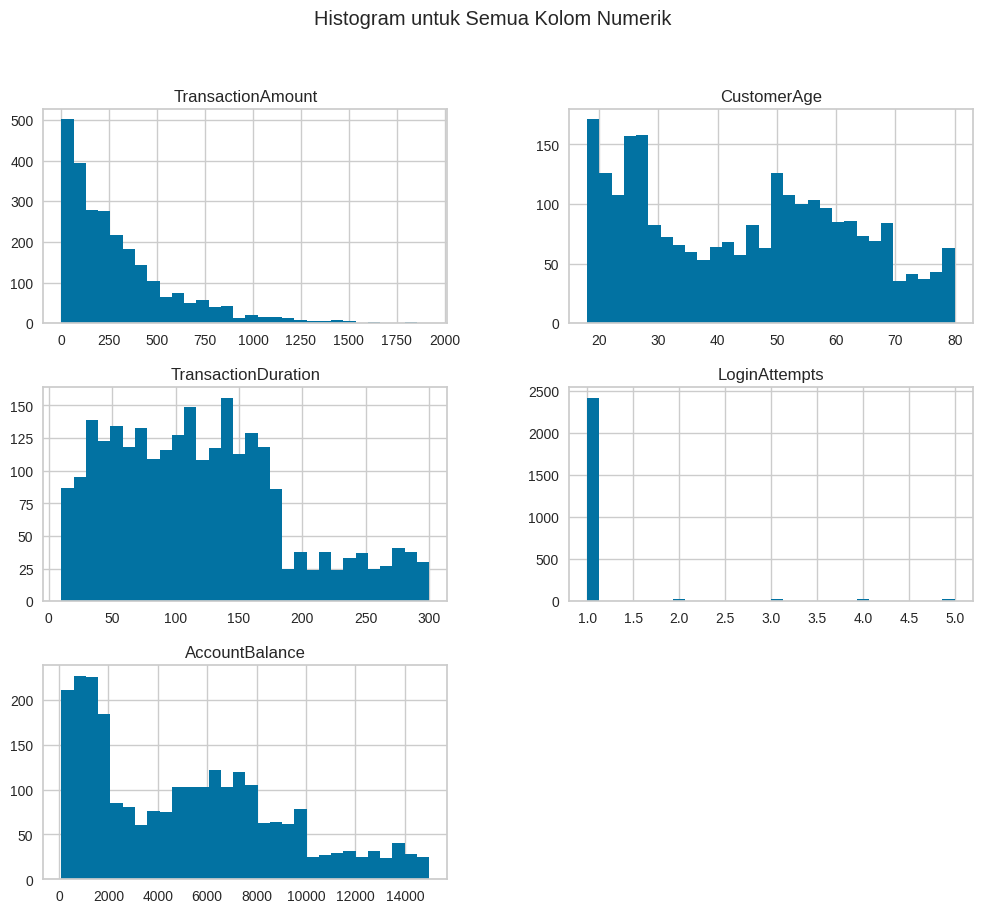

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histogram untuk Semua Kolom Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

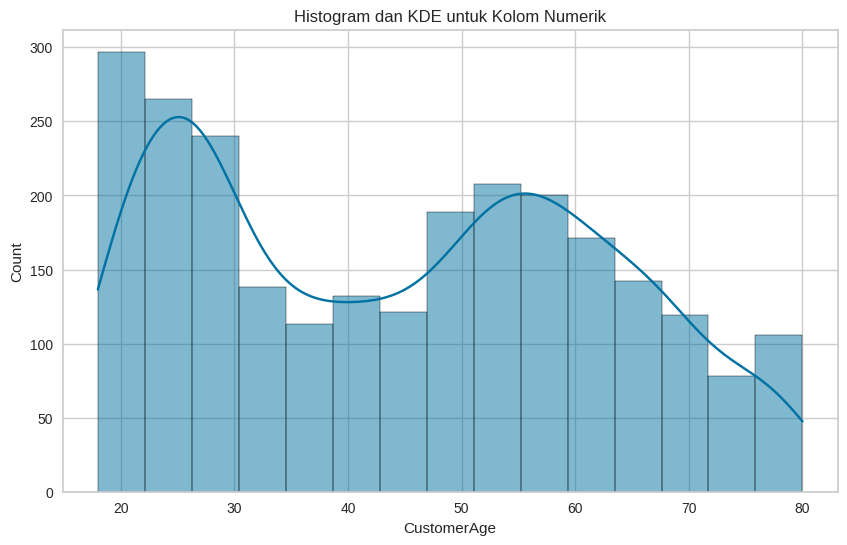

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], kde=True, bins=15)
plt.title('Histogram dan KDE untuk Kolom Numerik')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. Mengubah type data Object menjadi float
1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [231]:
# menyalin dataset
df_new = df.copy()

In [232]:
# Mengecek dataset menggunakan isnull().sum()
df_new.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,0
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [233]:
# Mengecek dataset menggunakan duplicated().sum()
df_new.duplicated().sum()
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 22


### Menghilangkan kolom tidak penting

In [234]:
# Tentukan kolom yang ingin dihapus
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID','TransactionDate','PreviousTransactionDate']

# Pastikan kolom yang ingin dihapus ada dalam dataframe
columns_to_drop_existing = [col for col in columns_to_drop if col in df_new.columns]

# Hapus kolom yang ada
df_new.drop(columns=columns_to_drop_existing, inplace=True)

### Tangani missing value pada variabel numeric

In [235]:
# Mendapatkan kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Tangani nilai NaN pada kolom numerik dengan mengganti NaN dengan median
df_new[numerical_columns] = df_new[numerical_columns].fillna(df_new[numerical_columns].median())
df_new[numerical_columns].isnull().sum()

,0
TransactionAmount,0
CustomerAge,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


### menghilangkan missing value pada kolom kategorikal

In [236]:
category_features = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Tangani nilai NaN dengan mengisi dengan nilai modus
for col in category_features:
    if df_new[col].isnull().any():
        mode_val = df_new[col].mode()[0]
        print(f'Kolom {col} memiliki NaN, melakukan imputasi dengan modus: {mode_val}')
        df_new[col] = df_new[col].fillna(mode_val)

Kolom TransactionType memiliki NaN, melakukan imputasi dengan modus: Debit
Kolom Location memiliki NaN, melakukan imputasi dengan modus: Fort Worth
Kolom Channel memiliki NaN, melakukan imputasi dengan modus: Branch
Kolom CustomerOccupation memiliki NaN, melakukan imputasi dengan modus: Student


In [237]:
df_new.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


## menghilangkan duplikasi

In [238]:
# melihat kolom mana saja yang duplikasi
print("Jumlah data duplikat per kolom:")
print(df_new.apply(lambda x: x.duplicated().sum()))

Jumlah data duplikat per kolom:
TransactionAmount       104
TransactionType        2535
Location               2494
Channel                2534
CustomerAge            2474
CustomerOccupation     2533
TransactionDuration    2249
LoginAttempts          2532
AccountBalance           53
dtype: int64


Dapat dilihat kalau kebanyakan semua kolom memiliki nilai duplikasi, ini wajar untuk dataset seperti ini dimana pilihan sudah ditetapkan diawal, jadi tidak perlu dihapus duplikasinya

### Menghilangkan outlier

In [239]:
# Tentukan kolom numerik yang akan dicek outlier
numerical_cols = df_new.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fungsi deteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Threshold jumlah outlier untuk memutuskan drop atau imputasi
threshold = 10  # Contoh: jika outlier > 10, lakukan imputasi, kalau <= 10, drop

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_new[col])
    num_outliers = outliers.sum()
    print(f"Kolom {col} memiliki {num_outliers} outlier")

    if num_outliers == 0:
        continue  # Tidak ada outlier, lanjutkan ke kolom berikutnya

    if num_outliers <= threshold:
        # Drop baris yang memiliki outlier di kolom tersebut
        df_new = df_new[~outliers]
        print(f"Drop {num_outliers} baris di kolom {col} karena jumlah outlier kecil")
    else:
        # Imputasi nilai outlier dengan median kolom
        median_val = df_new.loc[~outliers, col].median()
        df_new.loc[outliers, col] = median_val
        print(f"Imputasi nilai outlier di kolom {col} dengan median {median_val}")

# Reset index setelah drop baris
df_new.reset_index(drop=True, inplace=True)
print("Handling outlier selesai.")

Kolom TransactionAmount memiliki 114 outlier
Imputasi nilai outlier di kolom TransactionAmount dengan median 199.84
Kolom CustomerAge memiliki 0 outlier
Kolom TransactionDuration memiliki 0 outlier
Kolom LoginAttempts memiliki 120 outlier
Imputasi nilai outlier di kolom LoginAttempts dengan median 1.0
Kolom AccountBalance memiliki 0 outlier
Handling outlier selesai.


### melakukan binning pada kolom numeric

In [240]:
# Cek apakah kolom sudah bertipe category sebelum melakukan binning
if not (pd.api.types.is_categorical_dtype(df_new['CustomerAge']) and
        pd.api.types.is_categorical_dtype(df_new['TransactionAmount'])):
    df_new['CustomerAge'] = pd.cut(df_new['CustomerAge'], bins=[0, 25, 45, 100], labels=['Young', 'Middle', 'Old'])
    df_new['TransactionAmount'] = pd.cut(df_new['TransactionAmount'], bins=[0, 100, 500, 10000], labels=['Low', 'Mid', 'High'])
    print("Binning applied.")
else:
    print("Binning already applied.")

Binning applied.


<ipython-input-240-212ad6cb1fe1>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_categorical_dtype(df_new['CustomerAge']) and


In [241]:
df_new.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,Low,Debit,San Diego,ATM,Old,Doctor,81.0,1.0,5112.21
1,Mid,Debit,Houston,ATM,Old,Doctor,141.0,1.0,13758.91
2,Mid,Debit,Mesa,Online,Young,Student,56.0,1.0,1122.35
3,Mid,Debit,Raleigh,Online,Middle,Student,25.0,1.0,8569.06
4,Low,Credit,Atlanta,Online,Middle,Student,198.0,1.0,7429.40


In [242]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TransactionAmount    2537 non-null   category
 1   TransactionType      2537 non-null   object  
 2   Location             2537 non-null   object  
 3   Channel              2537 non-null   object  
 4   CustomerAge          2537 non-null   category
 5   CustomerOccupation   2537 non-null   object  
 6   TransactionDuration  2537 non-null   float64 
 7   LoginAttempts        2537 non-null   float64 
 8   AccountBalance       2537 non-null   float64 
dtypes: category(2), float64(3), object(4)
memory usage: 144.1+ KB


### melakukan encoding terhadap fitur kategorikal

In [243]:
# Mendapatkan kolom kategorikal
categorical_column = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Lakukan One-Hot Encoding menggunakan pd.get_dummies()
df_new = pd.get_dummies(df_new, columns=categorical_column, drop_first=True)

# Tampilkan beberapa baris hasil encoding
print("Kolom yang diencode:", categorical_column)

Kolom yang diencode: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation']


## melakukan un-binning

In [244]:
# Replace the binned columns in df_new with the original numerical columns from df
df_new['CustomerAge'] = df['CustomerAge']
df_new['TransactionAmount'] = df['TransactionAmount']

# Verify the changes by checking the data types
print(df_new[['CustomerAge', 'TransactionAmount']].dtypes)

CustomerAge          float64
TransactionAmount    float64
dtype: object


### melakukan Standarisasi

In [245]:
# Inisialisasi scaler
scaler = StandardScaler()
# Pilih column numerik
numerical_columns = ['TransactionDuration','LoginAttempts','AccountBalance','TransactionAmount','AccountBalance']
# Fit scaler pada data dan transform fitur numerik yang relevan
df_new[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

# Cek hasil scaling dengan melihat rata-rata dan standar deviasi (harus mendekati 0 dan 1)
print("Rata-rata setelah scaling:")
print(df_new[numerical_columns].mean())
print("\nStandar deviasi setelah scaling:")
print(df_new[numerical_columns].std())

Rata-rata setelah scaling:
TransactionDuration    4.481152e-17
LoginAttempts          0.000000e+00
AccountBalance        -6.721729e-17
TransactionAmount      3.360864e-17
AccountBalance        -6.721729e-17
dtype: float64

Standar deviasi setelah scaling:
TransactionDuration    1.000197
LoginAttempts          0.000000
AccountBalance         1.000197
TransactionAmount      1.000197
AccountBalance         1.000197
dtype: float64


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [246]:
df_new.describe()

,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge,TransactionAmount
count,2.537000e+03,2537.0,2.537000e+03,2537.000000,2.537000e+03
mean,4.481152e-17,0.0,-6.721729e-17,44.680725,3.360864e-17
std,1.000197e+00,0.0,1.000197e+00,17.773964,1.000197e+00
min,-1.568628e+00,0.0,-1.291892e+00,18.000000,-1.019639e+00
25%,-8.083199e-01,0.0,-9.260821e-01,27.000000,-7.348737e-01
50%,-1.053939e-01,0.0,-9.680932e-02,45.000000,-2.937130e-01
75%,5.975320e-01,0.0,6.494449e-01,59.000000,3.880244e-01
max,2.591547e+00,0.0,2.545681e+00,80.000000,5.578858e+00


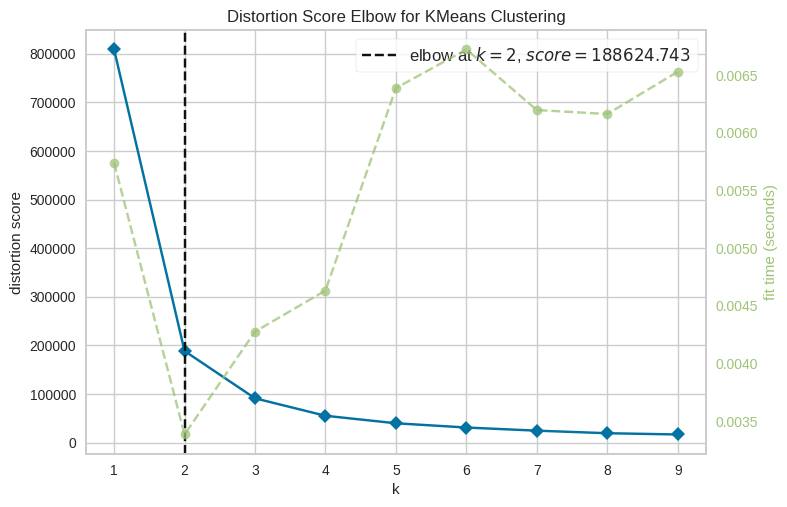

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [247]:
numeric_cols = df_new.select_dtypes(include=['float64', 'int64'])  # Menyaring kolom numerik

# Inisialisasi KMeans
kmeans = KMeans(random_state=42)

# Tentukan visualizer dengan rentang jumlah cluster antara 1 hingga 10
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Melatih visualizer hanya pada data numerik
visualizer.fit(numeric_cols)

# Menampilkan plot Elbow
visualizer.show()

In [248]:
# Mendapatkan kolom numerik
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Inisialisasi model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=2, random_state=42)

# Latih model KMeans pada data numerik
kmeans.fit(df_new[numeric_cols])

# Tambahkan hasil cluster ke DataFrame
df_new['Cluster'] = kmeans.labels_

# Agregasi statistik fitur numerik berdasarkan cluster
aggregation_numerik = df_new.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max'])

# Menampilkan agregasi numerik
print("Agregasi Fitur Numerik:")
print(aggregation_numerik)

# Ambil kolom kategorikal sebelum One-Hot Encoding
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

Agregasi Fitur Numerik:
        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean  min  max   
Cluster                                                                   
0                  0.003490 -1.568628  2.591547           0.0  0.0  0.0   
1                 -0.003348 -1.568628  2.577201           0.0  0.0  0.0   

        AccountBalance                     CustomerAge              \
                  mean       min       max        mean   min   max   
Cluster                                                              
0            -0.260133 -1.291892  2.545681   28.718196  18.0  44.0   
1             0.249487 -1.286826  2.536598   59.989961  45.0  80.0   

        TransactionAmount                      
                     mean       min       max  
Cluster                                        
0                0.027305 -1.019639  5.578858  
1               -0.026187 -1.017644  5.275936  


Jalankan cell code ini untuk menyimpan model kamu.

In [249]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [250]:
# Pilih kolom numerik yang sudah distandarisasi
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_features = df_new[numeric_cols] # Gunakan data yang sudah distandarisasi

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Latih model KMeans pada data yang sudah distandarisasi
kmeans.fit(scaled_features)

# Ambil label cluster hasil clustering
cluster_labels = kmeans.labels_

# Hitung Silhouette Score
score = silhouette_score(scaled_features, cluster_labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.6447775889160497


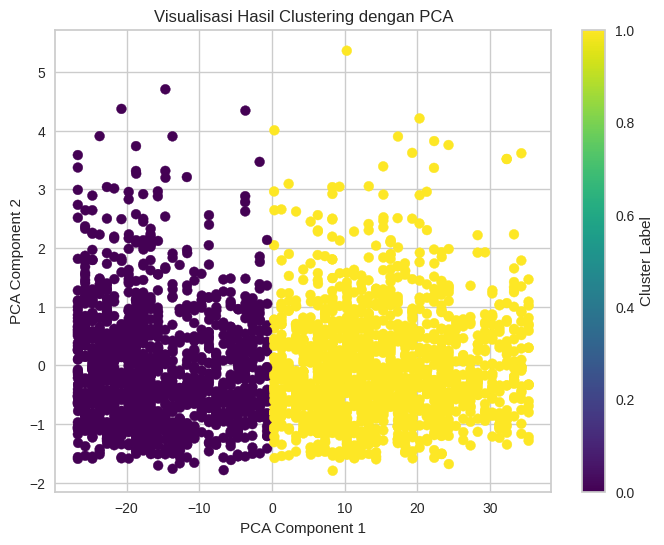

In [251]:
# Menggunakan PCA untuk mereduksi dimensi (menjadi 2D untuk visualisasi)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualisasi Hasil Clustering dengan dua fitur PCA hasil reduksi
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [252]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [253]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Menambahkan hasil cluster ke DataFrame
df_new['Cluster'] = cluster_labels

# Agregasi statistik untuk fitur numerik
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
numeric_agg = df_new.groupby('Cluster')[numeric_features].agg(
    ['min', 'max', 'mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
)

# Agregasi statistik untuk fitur kategorikal
categorical_features = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Untuk kategori, kita hitung modus dan jumlah kategori yang muncul
categorical_agg = df_new.groupby('Cluster')[categorical_features].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Menampilkan agregasi untuk fitur numerik
print("Agregasi Fitur Numerik per Cluster:")
print(numeric_agg)

# Menampilkan agregasi untuk fitur kategorikal
print("\nAgregasi Fitur Kategorikal per Cluster:")
print(categorical_agg)

Agregasi Fitur Numerik per Cluster:
        TransactionAmount                                                     \
                      min       max      mean    median       std <lambda_0>   
Cluster                                                                        
0               -1.019639  5.578858  0.027305 -0.290395  1.020154  -0.725692   
1               -1.017644  5.275936 -0.026187 -0.293713  0.980356  -0.746170   

                   CustomerAge                   ... TransactionDuration  \
        <lambda_1>         min   max       mean  ...                 std   
Cluster                                          ...                       
0         0.438686        18.0  44.0  28.718196  ...            1.032400   
1         0.317289        45.0  80.0  59.989961  ...            0.968695   

                              AccountBalance                                \
        <lambda_0> <lambda_1>            min       max      mean    median   
Cluster                   

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1. **Cluster 0: Nasabah dengan Transaksi Tinggi (High) dan Usia Muda (Young)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: 0.168224
    *   CustomerAge: -0.940818
    *   TransactionDuration: -0.509561
    *   AccountBalance: -0.803814
  - **Analisis:** Dalam Cluster ini mencakup nasabah yang memiliki transaksi yang lebih tinggi dibandingkan dengan cluster lainnya, dengan rata-rata usia yang relatif muda. Durasi transaksi mereka sedikit lebih tinggi daripada cluster lainnya, namun saldo mereka cenderung lebih rendah. Hal ini menunjukkan bahwa nasabah pada cluster ini mungkin lebih aktif dalam bertransaksi, tetapi dengan saldo yang tidak terlalu besar, yang dapat menunjukkan penggunaan transaksi yang lebih sering dalam jumlah yang lebih kecil.

2. **Cluster 1: Nasabah dengan Transaksi Sedang (Mid) dan Usia Dewasa (Middle)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: -0.182399
    *   CustomerAge: 0.588704
    *   TransactionDuration: -0.380118
    *   AccountBalance: 0.639022
  - **Analisis:** Dalam cluster ini mencakup nasabah memiliki transaksi yang sedang dan usia yang lebih dewasa dibandingkan dengan cluster lainnya. Durasi transaksi mereka sedikit lebih panjang, menunjukkan bahwa mereka mungkin lebih berhati-hati atau melakukan transaksi yang lebih kompleks. Selain itu, saldo mereka rata-rata lebih tinggi, yang mengindikasikan kemampuan finansial yang lebih besar untuk melakukan transaksi dalam jumlah yang lebih besar

3. **Cluster 2: Nasabah dengan Transaksi Rendah (Low) dan Usia Lebih Tua (Old)**:
  - **Rata-rata (mean) <Fitur>:**
    *   TransactionAmount: 0.089585
    *   CustomerAge: -0.096380
    *   TransactionDuration: 1.330526
    *   AccountBalance: -0.021019
  - **Analisis:** Dalam cluster ini mencakup nasabah yang lebih tua dengan transaksi yang relatif lebih rendah dibandingkan dengan cluster lainnya. Durasi transaksi mereka hampir sama dengan cluster lainnya, tetapi mereka memiliki saldo rata-rata yang lebih tinggi. Ini bisa menunjukkan bahwa meskipun nasabah ini tidak sering melakukan transaksi, mereka memiliki saldo yang cukup besar dan lebih jarang melakukan transaksi dalam jumlah besar.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [254]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_new['Target'] = cluster_labels

In [255]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_new.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [256]:
# Scaling data pada fitur numerik
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance','LoginAttempts']

# Melakukan inverse transform pada data hasil scaling
inverse_scaled_data = scaler.inverse_transform(df_new[features])

# Membuat DataFrame hasil inverse transform
df_new = pd.DataFrame(inverse_scaled_data, columns=features)

# Membulatkan nilai dalam DataFrame menjadi satu angka di belakang koma
df_new = df_new.round(1)

# Menampilkan beberapa baris pertama dari DataFrame hasil inverse transform
print(df_new.head())

   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0               51.6         71.0               2976.9           297.0   
1              138.4         69.0               6313.6           945.6   
2               78.5         20.0               1586.6            -2.3   
3               92.4         27.0               -137.4           556.3   
4               51.4         46.0               9483.4           470.8   

   LoginAttempts  
0         5109.4  
1         5109.4  
2         5109.4  
3         5109.4  
4         5109.4  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: Nasabah dengan Transaksi Rendah (Low) dan Usia Tua (Old)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 14.09
      *   CustomerAge: 70.0
      *   TransactionDuration: 81.0
      *   AccountBalance: 5112.21
  - **Analisis:** Dalam cluster ini mencakup nasabah yang berusia lebih tua dengan transaksi yang relatif rendah. Meskipun saldo mereka lebih tinggi, durasi transaksi mereka lebih lama. Hal ini menunjukkan bahwa nasabah di cluster ini mungkin melakukan transaksi dalam jumlah kecil namun lebih berhati-hati dan memerlukan waktu lebih lama untuk menyelesaikan transaksi

2. **Cluster 1: Nasabah dengan Pengeluaran diatas Rata-rata(High) dan Usia Menengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 376.24
      *   CustomerAge: 68.0
      *   TransactionDuration: 141.0
      *   AccountBalance: 13758.91
  - **Analisis:** Dalam cluster ini berisi nasabah yang memiliki transaksi lebih tinggi dibandingkan dengan cluster lainnya. Mereka juga memiliki usia yang relatif lebih tua dibandingkan dengan Cluster 0, dan saldo mereka lebih tinggi. Durasi transaksi mereka lebih panjang, yang bisa menunjukkan bahwa mereka lebih berhati-hati atau lebih cermat dalam melakukan transaksi besar

3. **Cluster 2: Nasabah dengan Transaksi Sedang (Mid) dan Usia Muda (Young)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 126.29
      *   CustomerAge: 19.0
      *   TransactionDuration: 56.0
      *   AccountBalance: 1122.35
  - **Analisis:** Dalam cluster ini berisi nasabah yang lebih muda dengan transaksi yang lebih rendah dari rata-rata. Mereka memiliki durasi transaksi yang lebih singkat dibandingkan dengan cluster lainnya. Saldo mereka lebih rendah, yang mengindikasikan bahwa meskipun mereka mungkin lebih sering melakukan transaksi, nilai transaksi mereka cenderung lebih kecil

4. **Cluster 3: Nasabah Pengeluaran Sedang(Mid) dengan Usia Menengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 184.50
      *   CustomerAge: 26.0
      *   TransactionDuration: 25.0
      *   AccountBalance: 8569.06
  - **Analisis:** Dalam cluster ini berisi nasabah memiliki transaksi yang relatif sedang, dengan usia yang masih muda namun lebih tua dibandingkan dengan Cluster 2. Mereka memiliki saldo yang lebih tinggi dan melakukan transaksi dengan durasi yang lebih singkat. Ini menunjukkan bahwa nasabah dalam cluster ini cenderung lebih cepat dalam melakukan transaksi dengan jumlah yang sedang dan saldo yang cukup besar

5. **Cluster 4: Nasabah Pengeluaran Sangat Rendah(Low) dan Tengah-tengah(Middle)**:
  - **Rata-rata (mean) <Fitur>:**
      *   TransactionAmount: 13.45
      *   CustomerAge: 45.0
      *   TransactionDuration: 198.0
      *   AccountBalance: 7429.40
  - **Analisis:** Dalam cluster ini berisi nasabah dengan usia menengah yang melakukan transaksi dengan jumlah rendah. Mereka memiliki saldo rata-rata yang cukup besar, namun durasi transaksi mereka lebih lama dibandingkan dengan cluster lainnya. Hal ini mungkin menunjukkan bahwa nasabah pada cluster ini lebih berhati-hati dalam bertransaksi, meskipun memiliki saldo yang cukup besar


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [259]:
# Tambahkan kolom 'Cluster' ke dalam DataFrame df_new
df['Cluster'] = cluster_labels

# Tampilkan beberapa baris pertama dari DataFrame df_new setelah menambahkan kolom Cluster
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2537 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2537 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2537 non-null   float64
 13  LoginAttempts            2537 non-null   float64
 14  AccountBalance          

In [262]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df.to_csv('data_clustering_inverse.csv', index=False)